In [7]:
# Install a pip package in the current Jupyter kernel
import sys
#!{sys.executable} -m pip install islp

In [61]:
import numpy as np
import pandas as pd
import os

# Import statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

# Graphing imports
from plotnine import *

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize,poly)

# Helper functions

## Data tegridy functions

In [46]:
def get_null_rows(df):
    """
    Check for null values in each column of a DataFrame and return a DataFrame with rows containing missing data.

    Parameters:
    - df: pandas DataFrame

    Returns:
    pandas DataFrame with rows containing missing data
    """
    # Check for null values in each column
    null_counts = df.isnull().sum()

    # Display null counts for each column
    for col, null_count in null_counts.items():
        print(f"Column '{col}': {null_count} null values")

    # Get rows with missing data
    null_rows = df[df.isnull().any(axis=1)]
    return null_rows

# Reading in the data

In [47]:
path = r'C:\Users\efv\OneDrive - Cal State Fullerton\2. Classes\Math 536\Homework\HW 2'
file = r'\hw2.csv'

file_path = path + file

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [48]:
# Verify data was read in correctly by viewing the first few rows
df.head()

,Spend,Revenue
0,675547,9.960378e+05
1,745358,1.020851e+06
2,662850,8.545532e+05
3,603379,7.613995e+05
4,582307,7.958348e+05


In [49]:
# View wall the columns we have
df.columns

Index(['Spend', 'Revenue'], dtype='object')

In [50]:
# Check to see if there are any nulls
df.isnull().sum()
get_null_rows(df)

Column 'Spend': 0 null values
Column 'Revenue': 0 null values


,Spend,Revenue


In [51]:
# Display the dimensions
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 267
Number of columns: 2


# EDA

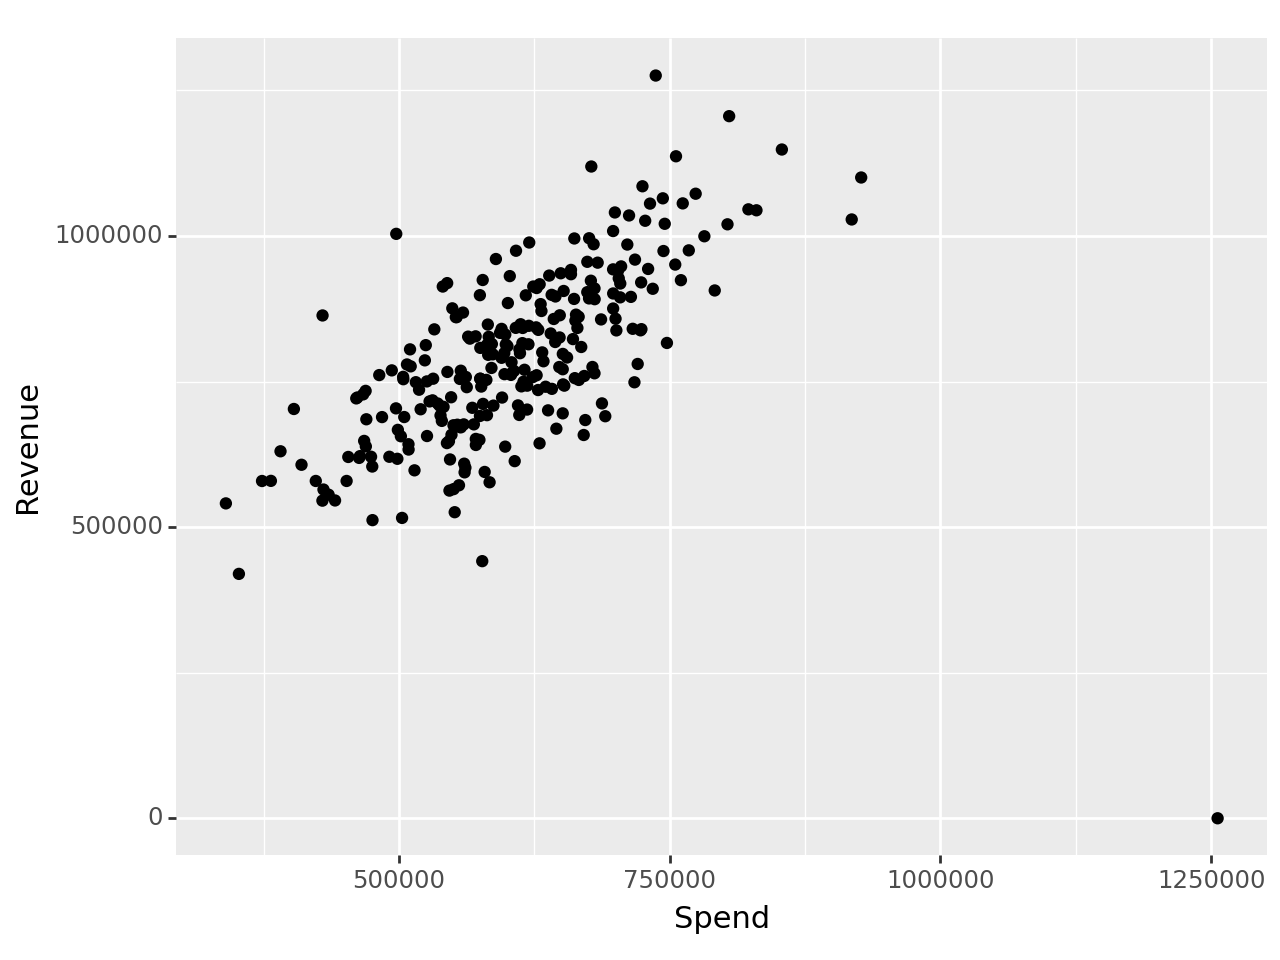

<Figure Size: (640 x 480)>

In [62]:
# Exploring our two variables

ggplot(df, aes(x='Spend', y='Revenue')) + \
geom_point()

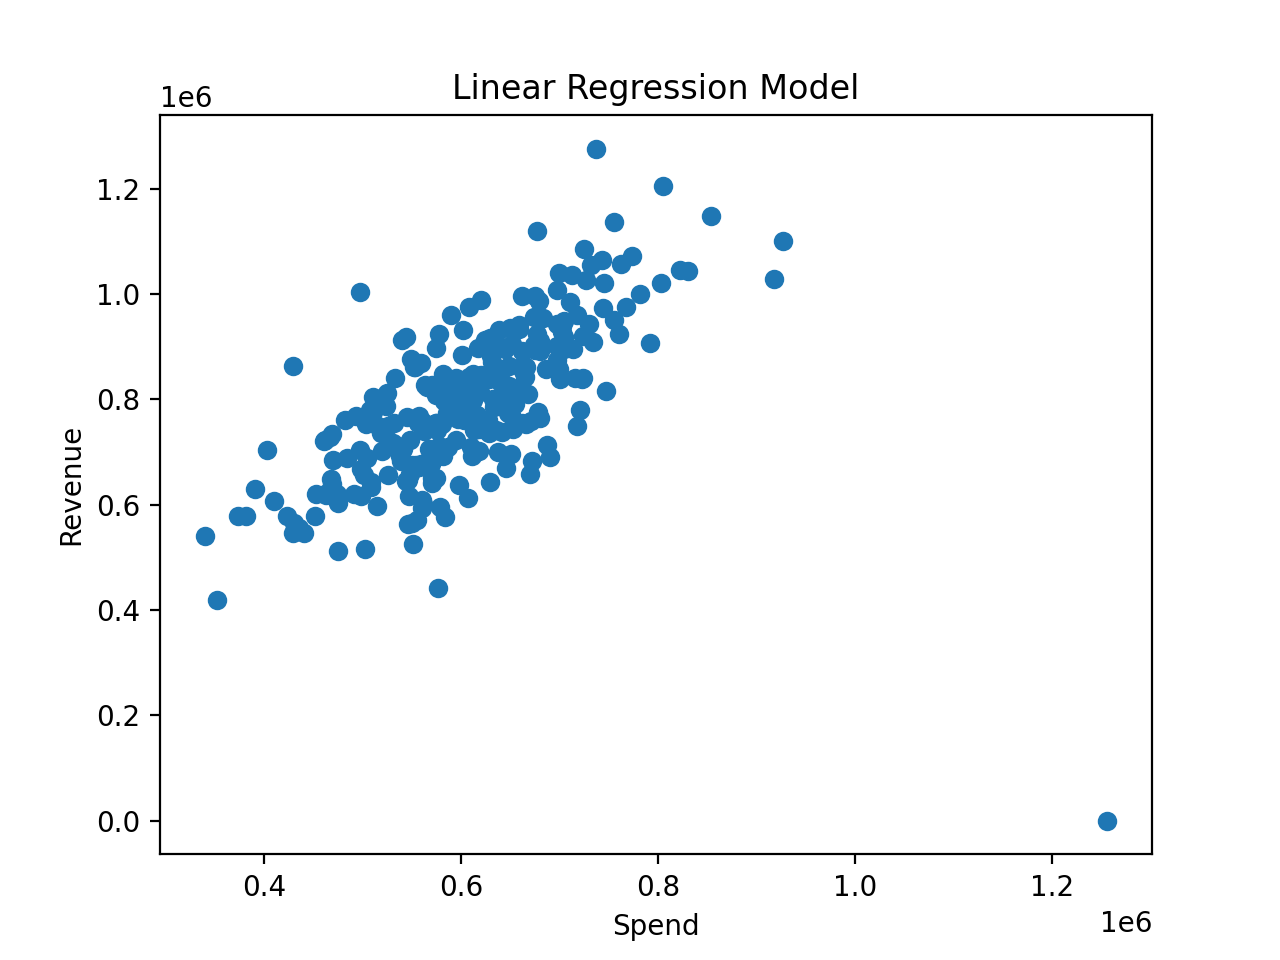

In [68]:
# Scatter plot of the data
plt.scatter(df['Spend'], df['Revenue'], label='Data points')

# Set labels and title
plt.xlabel('Spend')
plt.ylabel('Revenue')
plt.title('Linear Regression Model')


# Show the plot
plt.show()

# Model Build 1

In [53]:
df['intercept'] = 1

# Subset our columns as predictor and response
X = df[['Spend', 'intercept']]
Y = df[['Revenue']]

In [54]:
model = sm.OLS(Y, X)
results = model.fit()

In [55]:
summarize(results)

,coef,std err,t,P>|t|
Spend,0.7531,0.075,9.988,0.0
intercept,333900.0000,46400.000,7.193,0.0


In [59]:
rsquared = results.rsquared
print('R-squared:', rsquared)
# Not the best in the world. 

R-squared: 0.27350914917528324


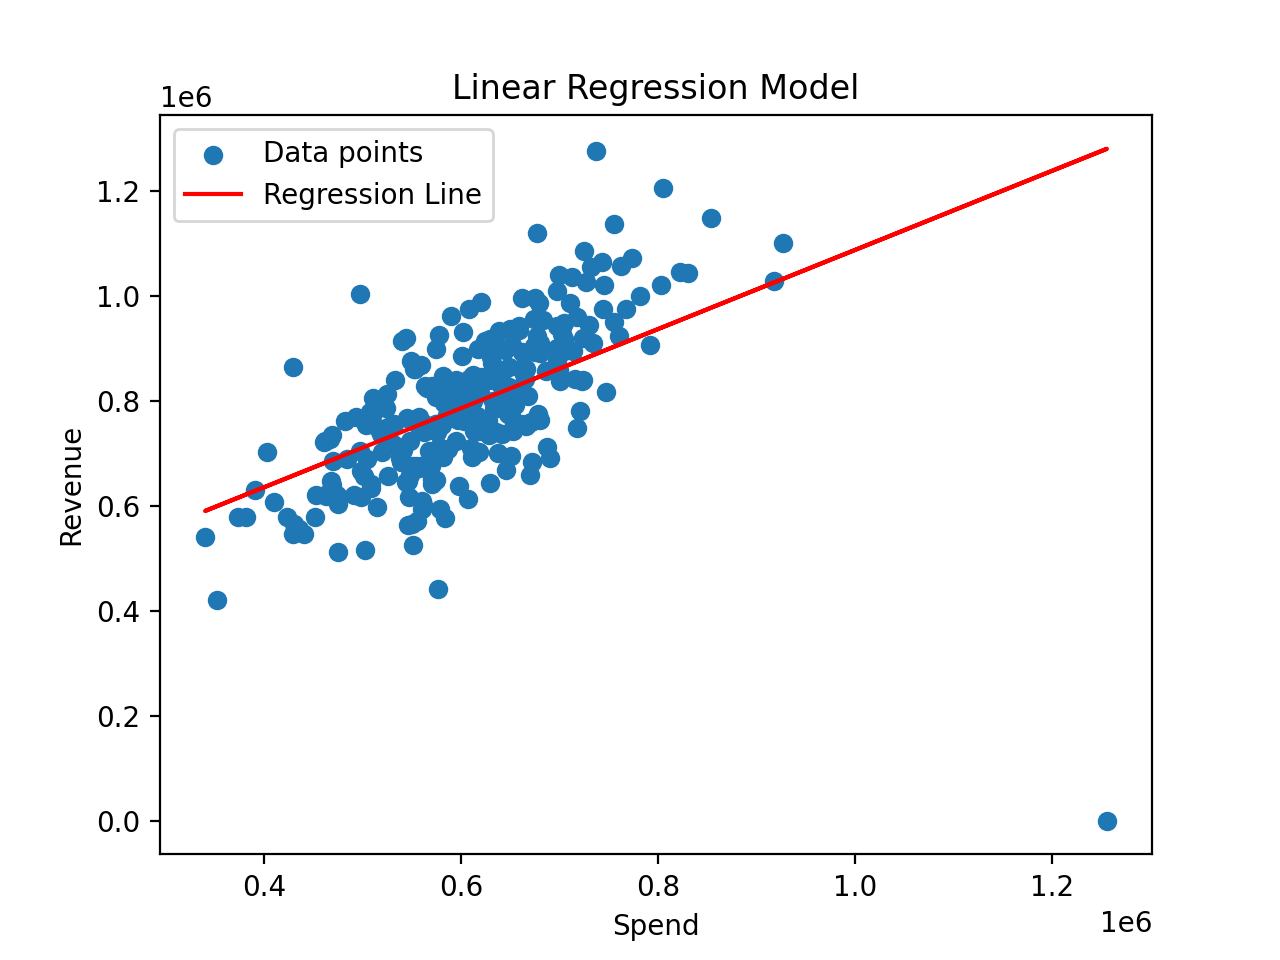

In [60]:
# Scatter plot of the data
plt.scatter(df['Spend'], df['Revenue'], label='Data points')

# Plot the regression line
plt.plot(df['Spend'], params['Spend']*df['Spend'] + params['intercept'], color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Spend')
plt.ylabel('Revenue')
plt.title('Linear Regression Model')

# Show legend
plt.legend()

# Show the plot
plt.show()

## LM Residual Diagnostics

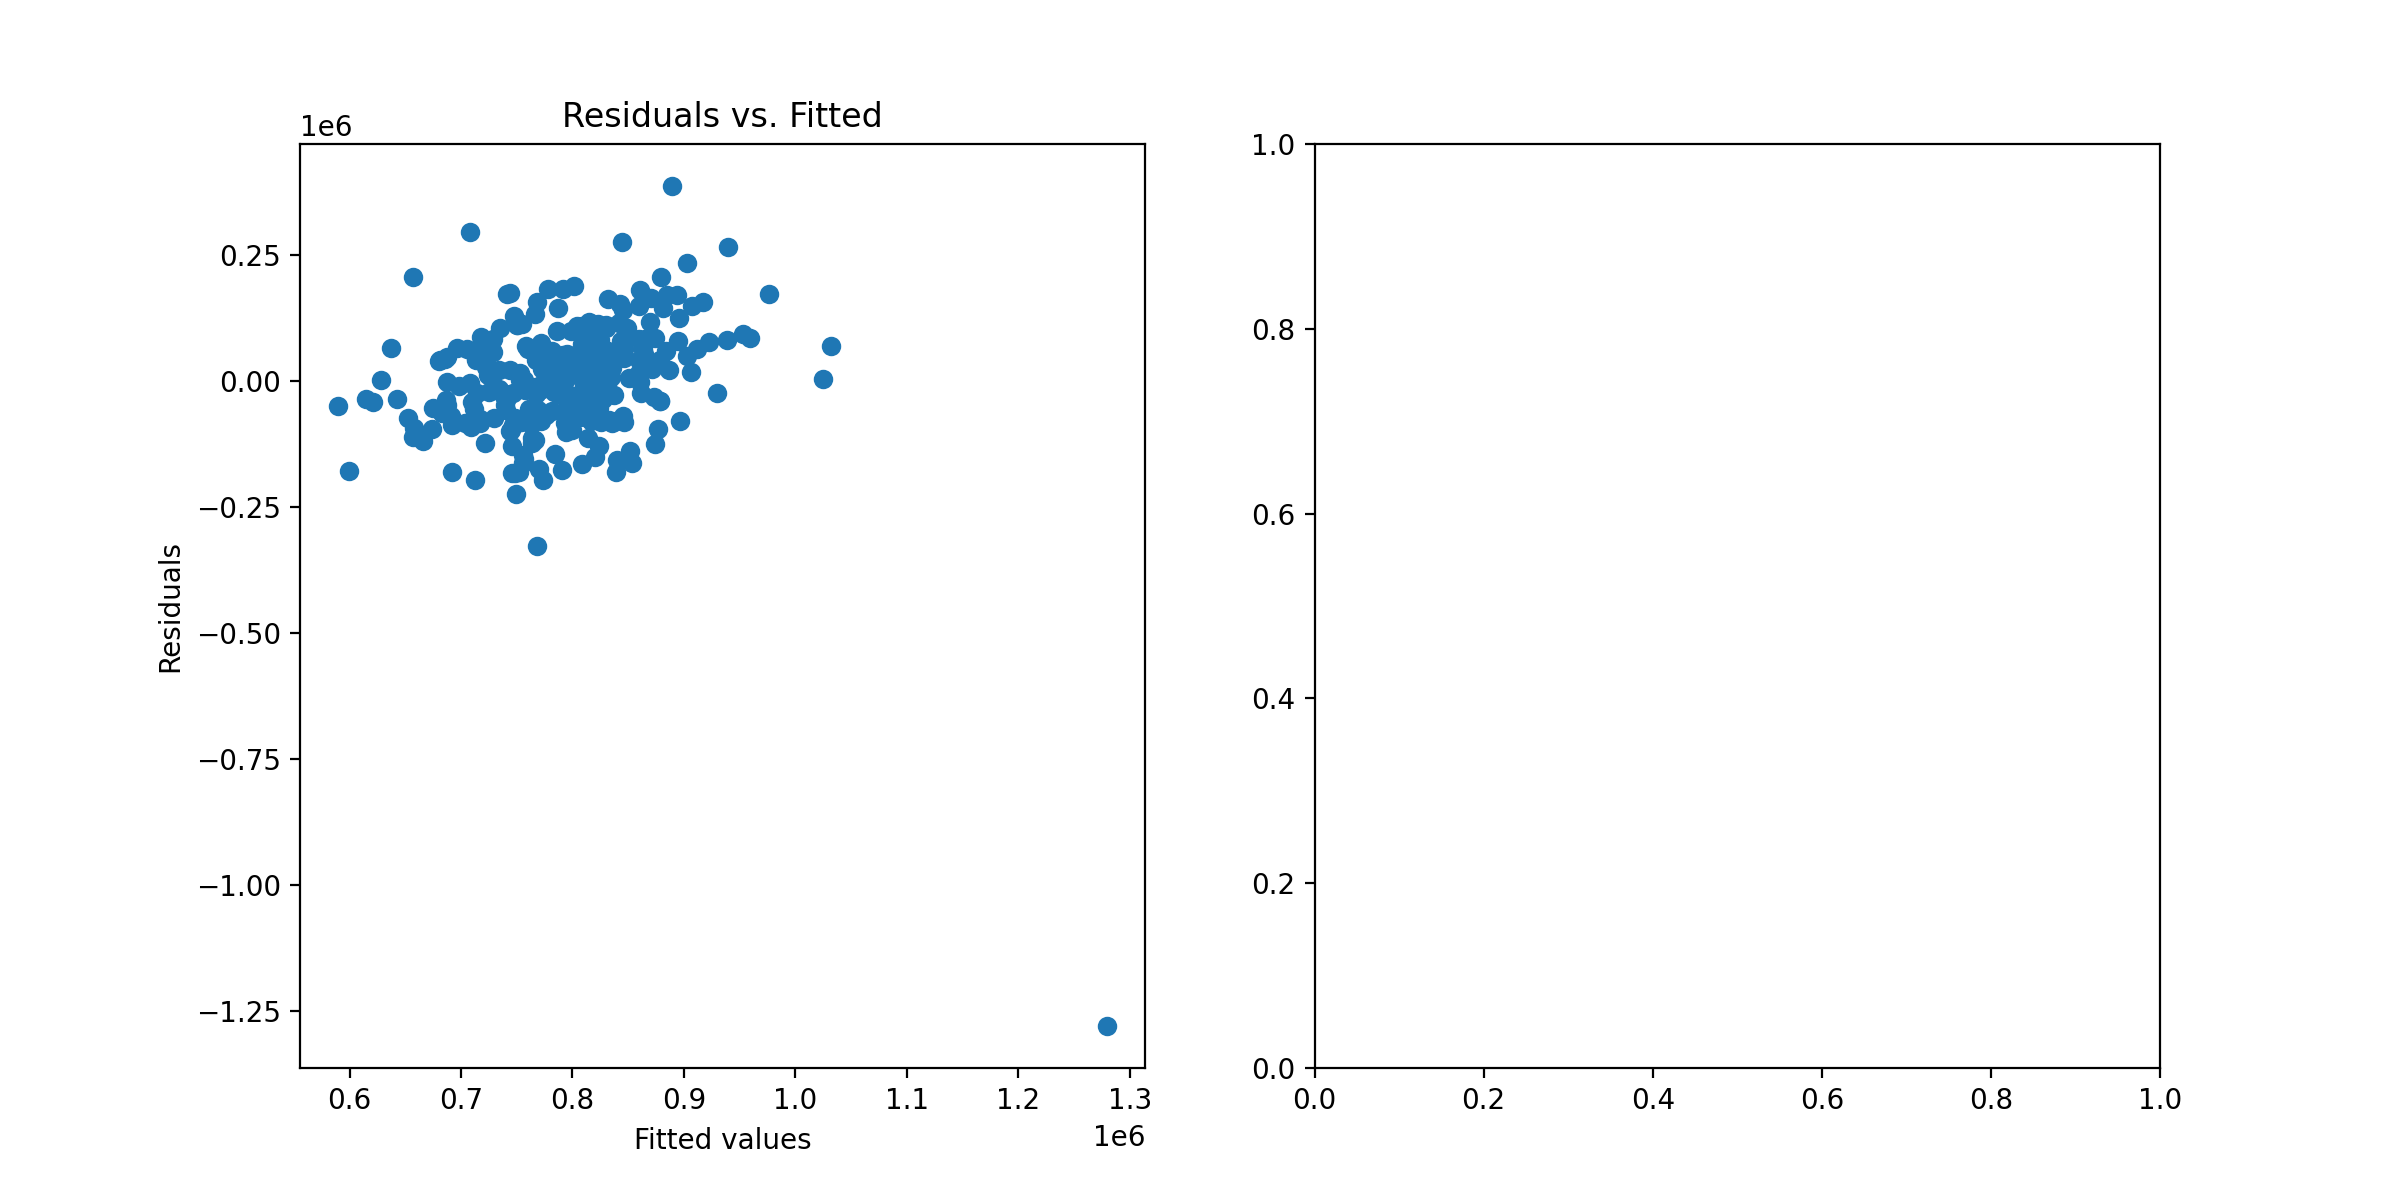

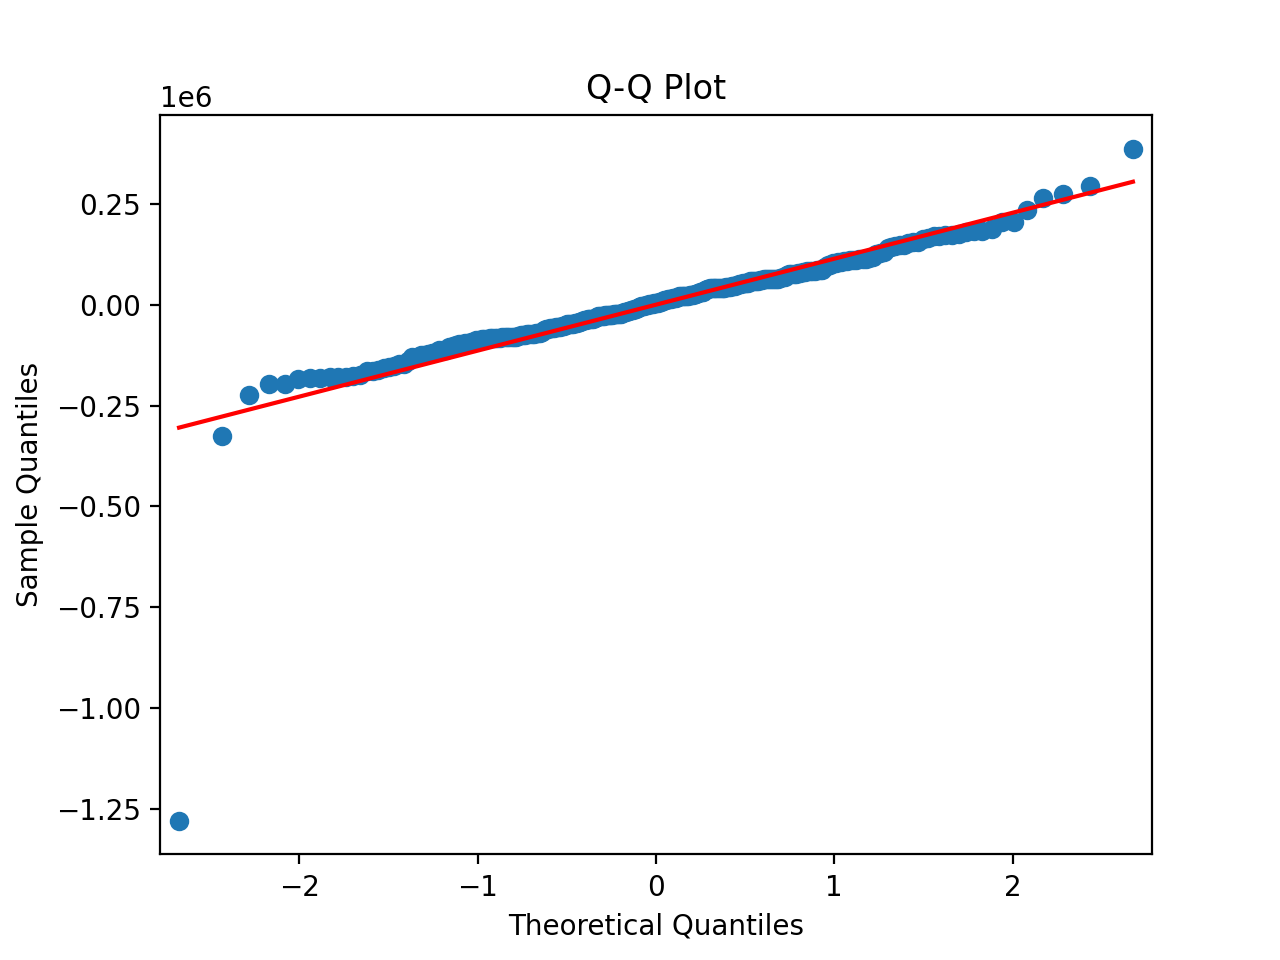

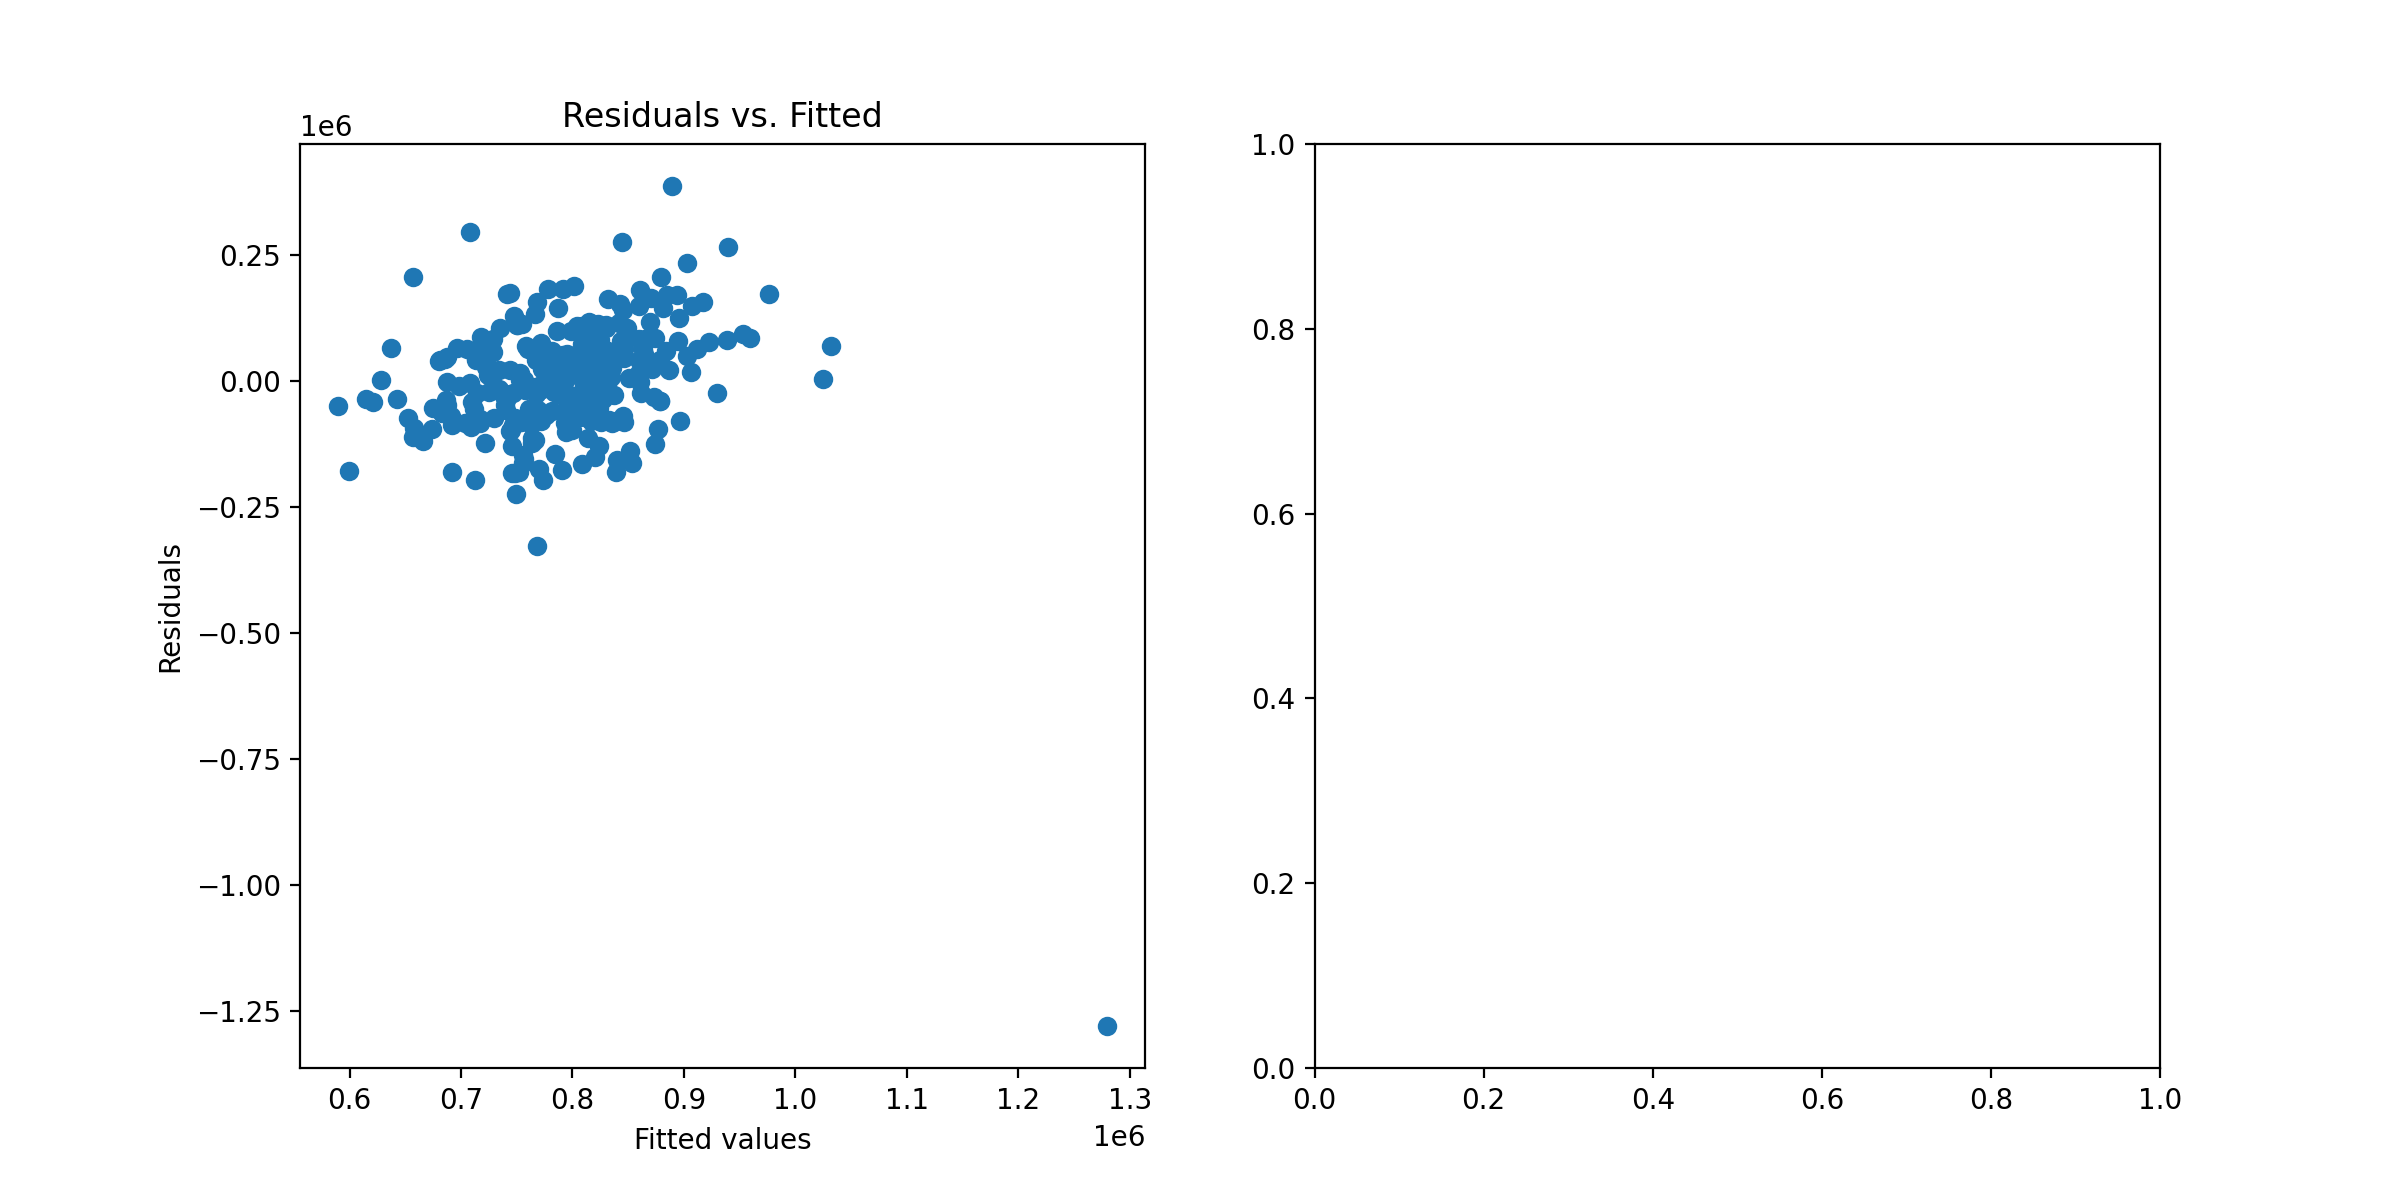

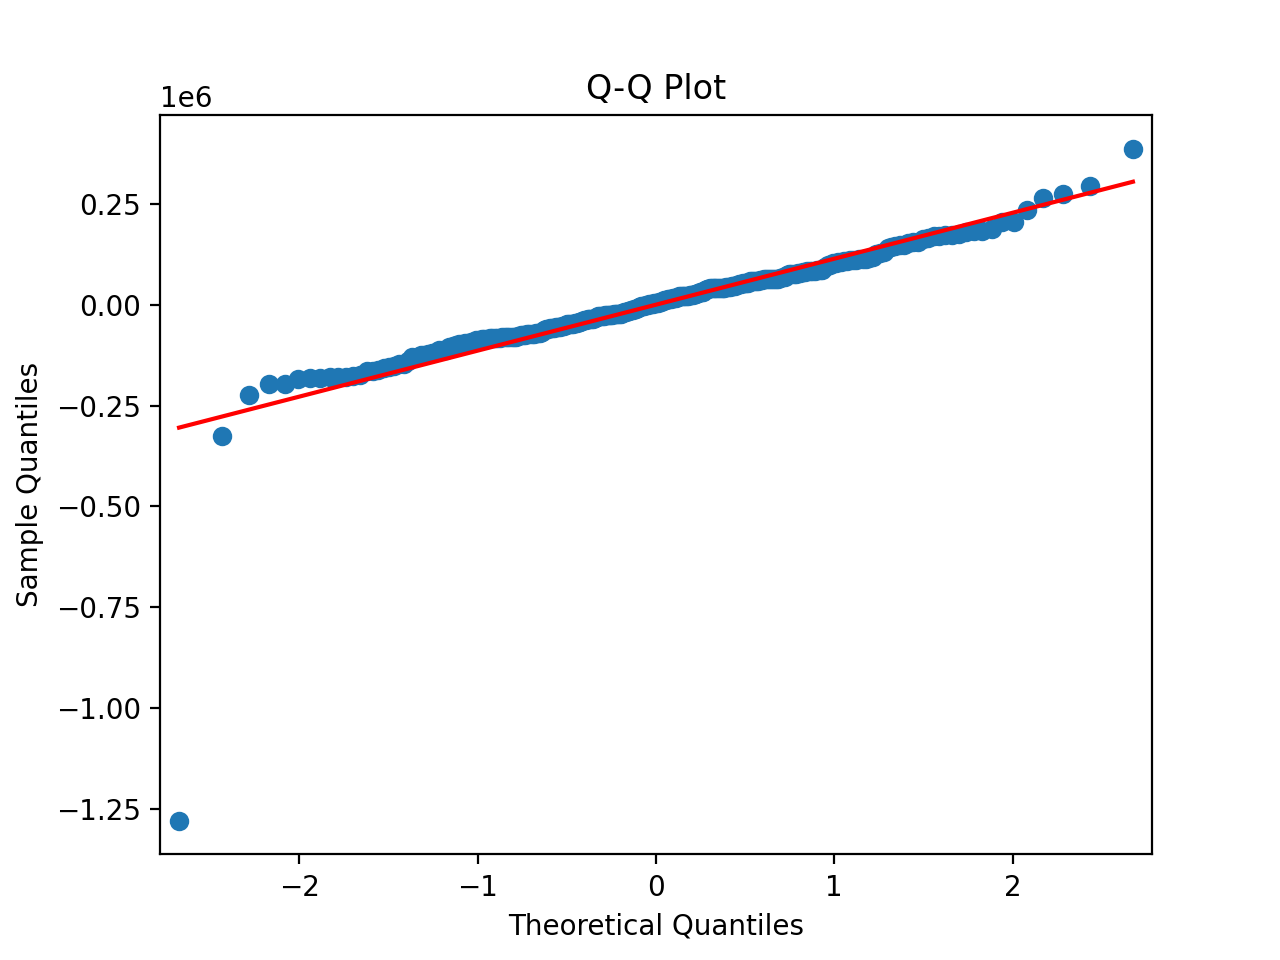

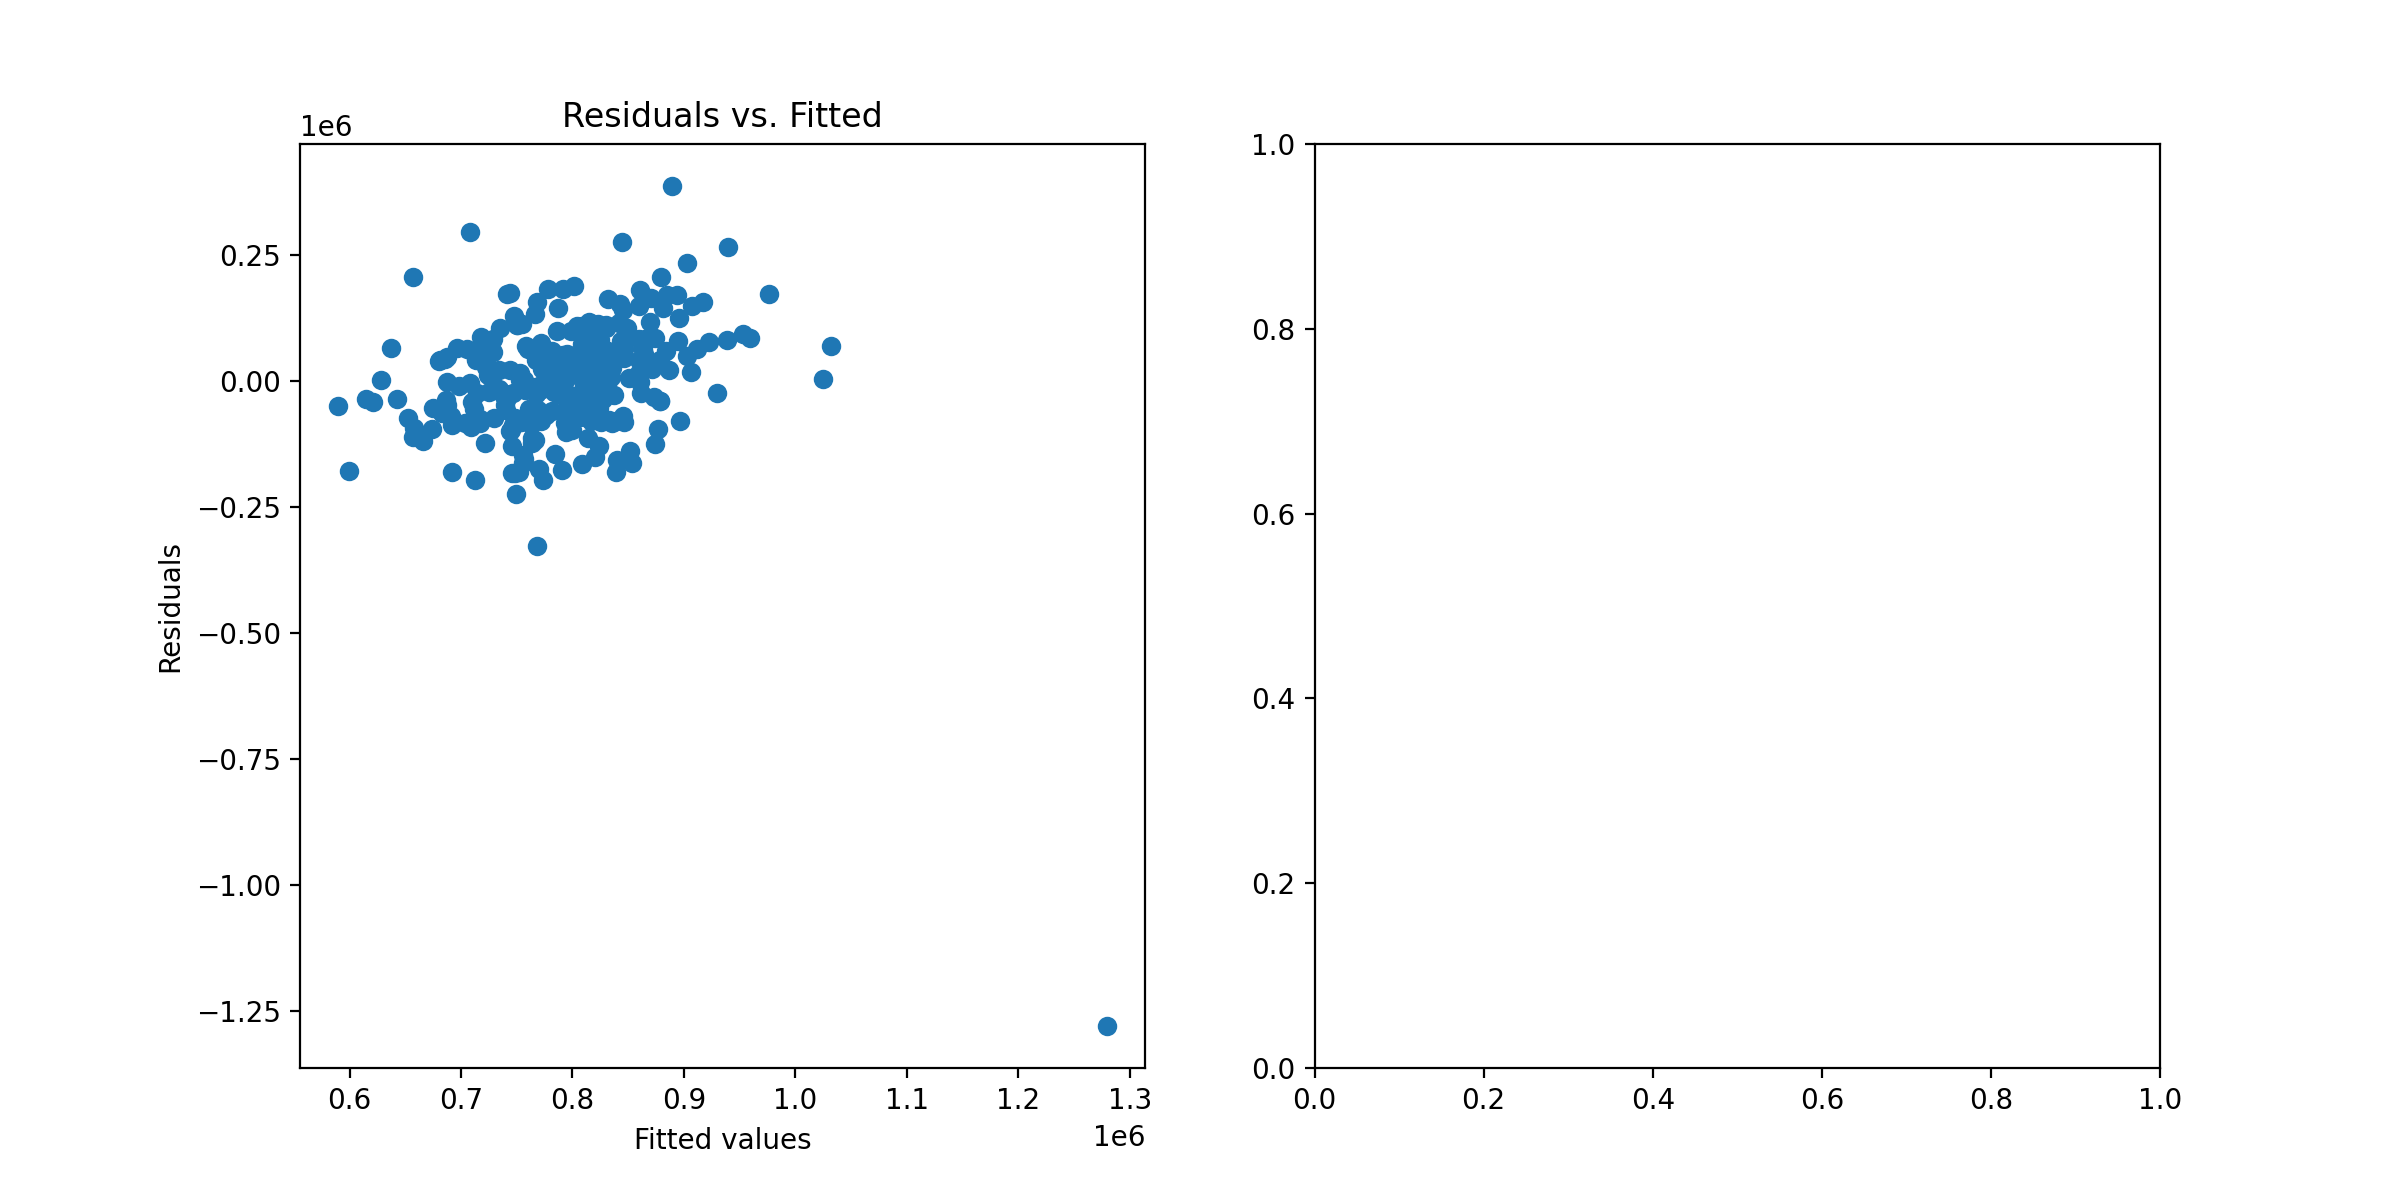

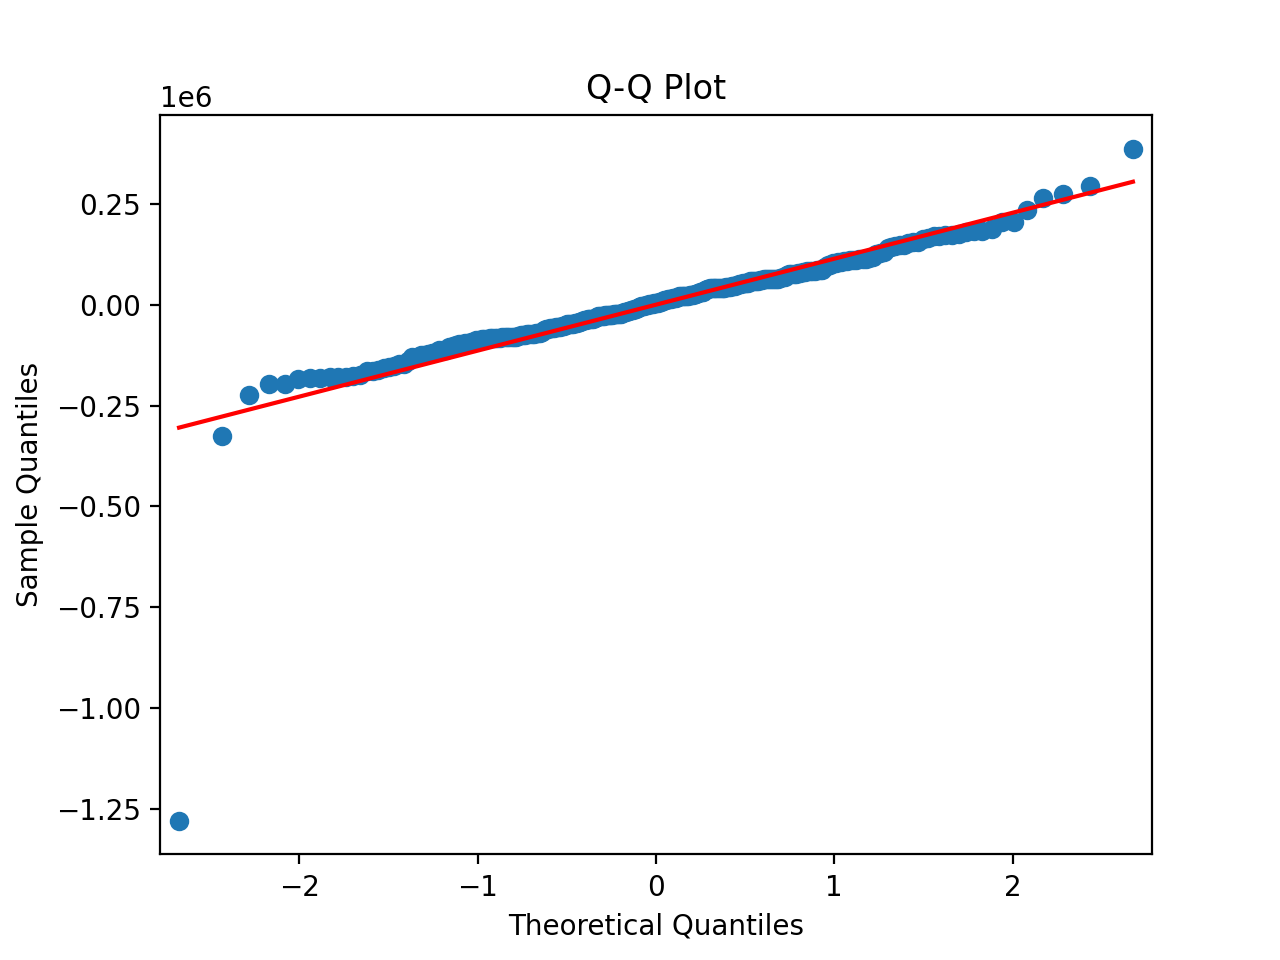

In [71]:
# Get residuals
residuals = model.resid

# Residuals vs. Fitted plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')

# Q-Q plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='r')
plt.title('Q-Q Plot')

plt.show()

# TO DO: residual diagnostics